In [19]:
from sklearn.datasets import load_iris
import pandas as pd

# Load the dataset
iris = load_iris()

# Convert to DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target

# Map target integers to species names
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Display the first few rows
print(df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = df.drop(columns=['species'])
y = df['species']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Apply PCA to the training data only, reducing to 2 components
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


# Print explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)



Explained Variance Ratio: [0.7070102  0.24507687]


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Initialize and train the model on PCA-transformed training data
model = LogisticRegression()
cv_scores = cross_val_score(model, X_train_pca, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Average CV Score:", cv_scores.mean())

# Train on the full training set
model.fit(X_train_pca, y_train)


Cross-Validation Scores: [1.         0.9047619  0.80952381 1.         0.80952381]
Average CV Score: 0.9047619047619048


LogisticRegression()

In [23]:
from sklearn.metrics import accuracy_score

# Make predictions on the test data (transformed by the PCA from training data)
y_pred = model.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print("Test Set Accuracy:", accuracy)


Test Set Accuracy: 0.9111111111111111


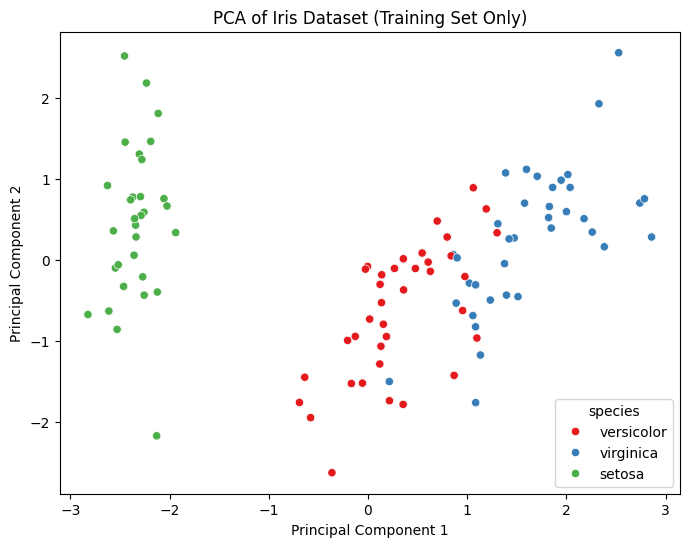

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the PCA results to DataFrame for plotting
pca_df = pd.DataFrame(X_train_pca, columns=['PC1', 'PC2'])
pca_df['species'] = y_train.reset_index(drop=True)

# Scatter plot of the two principal components
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='species', data=pca_df, palette='Set1')
plt.title('PCA of Iris Dataset (Training Set Only)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [25]:
from sklearn.decomposition import PCA

# Set the threshold for explained variance
pca = PCA(n_components=0.95)  # Keep enough components to explain 95% of the variance

# Fit PCA on the training data
X_train_pca = pca.fit_transform(X_train_scaled)

# Transform the test data using the PCA model fitted on the training data
X_test_pca = pca.transform(X_test_scaled)

# Output the number of components chosen and the explained variance
print("Number of Components Selected:", pca.n_components_)
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Cumulative Explained Variance:", pca.explained_variance_ratio_.sum())


Number of Components Selected: 2
Explained Variance Ratio: [0.7070102  0.24507687]
Cumulative Explained Variance: 0.9520870679186885


In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Initialize and train the model on PCA-transformed training data
model = LogisticRegression()
cv_scores = cross_val_score(model, X_train_pca, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Average CV Score:", cv_scores.mean())

# Train on the full training set
model.fit(X_train_pca, y_train)


Cross-Validation Scores: [1.         0.9047619  0.80952381 1.         0.80952381]
Average CV Score: 0.9047619047619048


LogisticRegression()

In [27]:
from sklearn.decomposition import PCA

# Apply PCA with a threshold to retain 95% variance
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)

# Transform the test set using the same PCA
X_test_pca = pca.transform(X_test_scaled)

# Output the number of components and explained variance
print("Number of Components Selected:", pca.n_components_)
print("Explained Variance Ratio of each component:", pca.explained_variance_ratio_)
print("Cumulative Explained Variance:", pca.explained_variance_ratio_.sum())


Number of Components Selected: 2
Explained Variance Ratio of each component: [0.7070102  0.24507687]
Cumulative Explained Variance: 0.9520870679186885


Check the Results
The code above will output:

The number of components automatically chosen by PCA to reach at least 95% explained variance.
The variance ratio of each selected component.
The cumulative explained variance to confirm it meets or exceeds 95%.

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

# Train the model and evaluate using cross-validation
model = LogisticRegression()
cv_scores = cross_val_score(model, X_train_pca, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Average CV Score:", cv_scores.mean())

# Final model training on the entire training set
model.fit(X_train_pca, y_train)

# Evaluate on the test set
y_pred = model.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print("Test Set Accuracy:", accuracy)


Cross-Validation Scores: [1.         0.9047619  0.80952381 1.         0.80952381]
Average CV Score: 0.9047619047619048
Test Set Accuracy: 0.9111111111111111


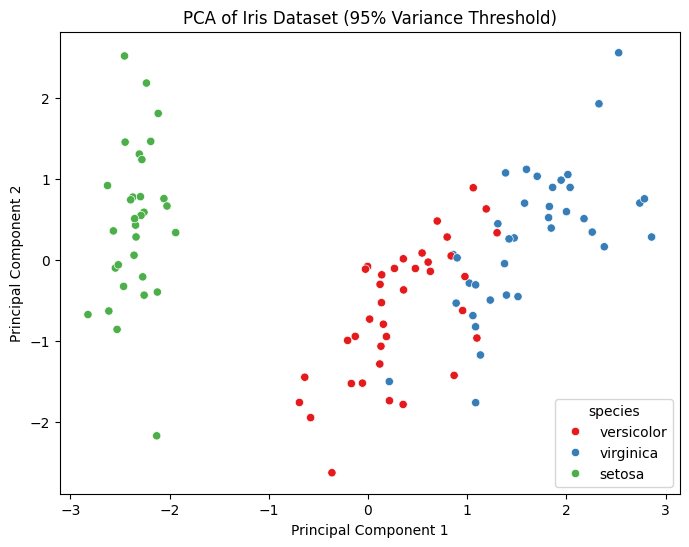

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

if pca.n_components_ >= 2:
    pca_df = pd.DataFrame(X_train_pca[:, :2], columns=['PC1', 'PC2'])
    pca_df['species'] = y_train.reset_index(drop=True)

    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='PC1', y='PC2', hue='species', data=pca_df, palette='Set1')
    plt.title('PCA of Iris Dataset (95% Variance Threshold)')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()
else:
    print("Not enough components retained for a 2D plot.")
